In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from keras import layers
from keras.preprocessing import image_dataset_from_directory
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os, shutil

# Funções

In [ ]:
def get_true_pred(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset.unbatch().batch(1):
        y_true.append(np.argmax(labels.numpy()))
        pred = model.predict(images, verbose=0)
        y_pred.append(np.argmax(pred))
    return np.array(y_true), np.array(y_pred)

## Carregamento do dataset
Carrega o dataset distribuido pelos diferentes conjuntos de dados.


In [ ]:
train_dir = 'Dataset/archive/seg_train'
validation_dir = 'Dataset/archive/seg_val'
test_dir = 'Dataset/archive/seg_test'

train_buildings_dir = 'Dataset/archive/seg_train/buildings/'
train_forest_dir = 'Dataset/archive/seg_train/forest'
train_glacier_dir = 'Dataset/archive/seg_train/glacier'
train_mountain_dir = 'Dataset/archive/seg_train/mountain'
train_sea_dir = 'Dataset/archive/seg_train/sea'
train_street_dir = 'Dataset/archive/seg_train/street'

val_buildings_dir = 'Dataset/archive/seg_val/buildings'
val_forest_dir = 'Dataset/archive/seg_val/forest'
val_glacier_dir = 'Dataset/archive/seg_val/glacier'
val_mountain_dir = 'Dataset/archive/seg_val/mountain'
val_sea_dir = 'Dataset/archive/seg_val/sea'
val_street_dir = 'Dataset/archive/seg_val/street'

test_buildings_dir = 'Dataset/archive/seg_test/buildings'
test_forest_dir = 'Dataset/archive/seg_test/forest'
test_glacier_dir = 'Dataset/archive/seg_test/glacier'
test_mountain_dir = 'Dataset/archive/seg_test/mountain'
test_sea_dir = 'Dataset/archive/seg_test/sea'
test_street_dir = 'Dataset/archive/seg_test/street'

print('total training buildings images:', len(os.listdir(train_buildings_dir)))
print('total training forest images:', len(os.listdir(train_forest_dir)))
print('total training glacier images:', len(os.listdir(train_glacier_dir)))
print('total training mountain images:', len(os.listdir(train_mountain_dir)))
print('total training sea images:', len(os.listdir(train_sea_dir)))
print('total training street images:', len(os.listdir(train_street_dir)))

print('total validation buildings images:', len(os.listdir(val_buildings_dir)))
print('total validation forest images:', len(os.listdir(val_forest_dir)))
print('total validation glacier images:', len(os.listdir(val_glacier_dir)))
print('total validation mountain images:', len(os.listdir(val_mountain_dir)))
print('total validation sea images:', len(os.listdir(val_sea_dir)))
print('total validation street images:', len(os.listdir(val_street_dir)))

print('total test buildings images:', len(os.listdir(test_buildings_dir)))
print('total test forest images:', len(os.listdir(test_forest_dir)))
print('total test glacier images:', len(os.listdir(test_glacier_dir)))
print('total test mountain images:', len(os.listdir(test_mountain_dir)))
print('total test sea images:', len(os.listdir(test_sea_dir)))
print('total test street images:', len(os.listdir(test_street_dir)))

total training buildings images: 1691
total training forest images: 1771
total training glacier images: 1904
total training mountain images: 2012
total training sea images: 1774
total training street images: 1882
total validation buildings images: 500
total validation forest images: 500
total validation glacier images: 500
total validation mountain images: 500
total validation sea images: 500
total validation street images: 500
total test buildings images: 437
total test forest images: 474
total test glacier images: 553
total test mountain images: 525
total test sea images: 510
total test street images: 501


## Distribuição de imagens por classe e por conjunto de dados
As imagens estão distribuidas por 3 conjuntos de dados: train, validation e test.
Cada um desses conjuntos está distribuido por 6 classes: buildings, forest, glacier, mountain, sea e street.

### Número total de imagens por classe:

| Classe     | Treino | Validação | Teste | Total |
|------------|--------|-----------|-------|-------|
| Buildings  | 1691   | 500       | 437   | 2628  |
| Forest     | 1771   | 500       | 474   | 2745  |
| Glacier    | 1904   | 500       | 553   | 2957  |
| Mountain   | 2012   | 500       | 525   | 3037  |
| Sea        | 1774   | 500       | 510   | 2784  |
| Street     | 1882   | 500       | 501   | 2883  |
| **Total**  | **11034** | **3000** | **3000** | **17034** |

### Número total de imagens por conjunto de dados:

| Conjunto de dados | Total |
|-------------------|-------|
| Treino            | 11034 |
| Validação         | 3000  |
| Teste             | 3000  |
| **Total geral**   | **17034** |


# Processamento dos dados

 Carrega, redimensiona e organiza imagens em batches com rótulos one-hot, preparando os dados de treino, validação e teste.

In [ ]:
IMG_SIZE = 150
BATCH_SIZE = 32

# Processing the data
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

print(test_dataset)
class_names = train_dataset.class_names
print("Classes:", class_names)


Found 11034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>
Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


# Carregamento dos modelos

In [ ]:
model = keras.models.load_model('modelT_featureExtraction_full.keras')
model_DA = keras.models.load_model('modelT_featureExtraction_DataAugmentation.keras')

I0000 00:00:1749766841.810864    1300 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6406 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1
/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Freeze conv base (model without data augmentation)

Ativação do treino do modelo VGG16 pré-treinado (convbase) e congelamento de todas as camadas exceto as últimas quatro, permitindo ajustar apenas as camadas superiores durante o fine-tuning. Imprissão do estado de cada camada para confirmar quais estão treináveis.

In [ ]:
convbase = model.get_layer("vgg16")
convbase.trainable = True
for layer in convbase.layers[:-4]:
    layer.trainable = False
for i, layer in enumerate(convbase.layers):
    print(i, layer.name, layer.trainable)

0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


## Compilação da CNN
Compilação da CNN utilizando a loss **categorical crossentropy** e o optimizer **RMSprop**.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

## Definição do callback
Definição de um callback que guarda automaticamente o modelo com a menor perda (loss) de validação durante o treino.

In [ ]:
checkpoint_filepath = 'modelT_fineTuning.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True)

## Treino da CNN
Treino da CNN durante 50 épocas utilizando o dataset de validação e o callback para guardar o melhor modelo.

In [ ]:
history = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=[model_checkpoint_callback])

Epoch 1/50


I0000 00:00:1749675373.235249  103471 service.cc:152] XLA service 0x7d2dd80042b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749675373.235292  103471 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-06-11 21:56:13.352846: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749675373.750440  103471 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-11 21:56:18.065368: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.39 = (f32[32,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0} %bitcast.4472, f32[64,3,3,3]{3,2,1,0} %bitcast.4479, f32[64]{0} %bitcast.4481), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__c

  2/345 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 1.0000 - loss: 6.2721e-06   

I0000 00:00:1749675387.517783  103471 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/345 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8881 - loss: 0.5894

2025-06-11 21:57:02.917473: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.39 = (f32[26,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[26,3,150,150]{3,2,1,0} %bitcast.4472, f32[64,3,3,3]{3,2,1,0} %bitcast.4479, f32[64]{0} %bitcast.4481), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1_1/vgg16_1/block1_conv1_1/convolution" source_file="/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-11 21:57:03.211909: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_

345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8880 - loss: 0.5893

2025-06-11 21:57:13.914849: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.49 = (f32[32,512,9,9]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,512,9,9]{3,2,1,0} %bitcast.996, f32[512,512,3,3]{3,2,1,0} %bitcast.1003, f32[512]{0} %bitcast.1005), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1_1/vgg16_1/block5_conv1_1/convolution" source_file="/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-11 21:57:21.231153: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_pi

345/345 ━━━━━━━━━━━━━━━━━━━━ 77s 178ms/step - accuracy: 0.8880 - loss: 0.5891 - val_accuracy: 0.8570 - val_loss: 0.5139
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 43s 123ms/step - accuracy: 0.8778 - loss: 0.4332 - val_accuracy: 0.8850 - val_loss: 0.4489
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.8992 - loss: 0.3849 - val_accuracy: 0.8900 - val_loss: 0.5676
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 45s 130ms/step - accuracy: 0.9108 - loss: 0.3207 - val_accuracy: 0.8777 - val_loss: 0.3595
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.9117 - loss: 0.3213 - val_accuracy: 0.8853 - val_loss: 0.3997
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.9115 - loss: 0.3102 - val_accuracy: 0.9150 - val_loss: 0.4201
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - accuracy: 0.9224 - loss: 0.3011 - val_accuracy: 0.9140 - val_loss: 0.6218
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.9284 - loss: 0.3122 - val

## Carregamento do modelo e validação
Carregamento e avaliação do modelo através do valor da accuracy.

In [ ]:
# Loading and testing the model
model = keras.models.load_model('modelT_fineTuning.keras')
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

I0000 00:00:1749766911.495682    1673 service.cc:152] XLA service 0x719dd400d0a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749766911.495732    1673 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-06-12 23:21:51.540207: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749766911.648313    1673 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-12 23:21:54.656154: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.39 = (f32[32,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0} %bitcast.850, f32[64,3,3,3]{3,2,1,0} %bitcast.857, f32[64]{0} %bitcast.859), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudn

 2/94 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8516 - loss: 0.3470  

I0000 00:00:1749766921.174882    1673 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8806 - loss: 0.3262

2025-06-12 23:22:11.066727: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.39 = (f32[24,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,150,150]{3,2,1,0} %bitcast.850, f32[64,3,3,3]{3,2,1,0} %bitcast.857, f32[64]{0} %bitcast.859), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1_1/vgg16_1/block1_conv1_1/convolution" source_file="/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-12 23:22:11.372799: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_pic

94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 162ms/step - accuracy: 0.8805 - loss: 0.3269
val_acc: 0.8776666522026062


Representação gráfica dos valores da accuracy e da loss ao longo das épocas.

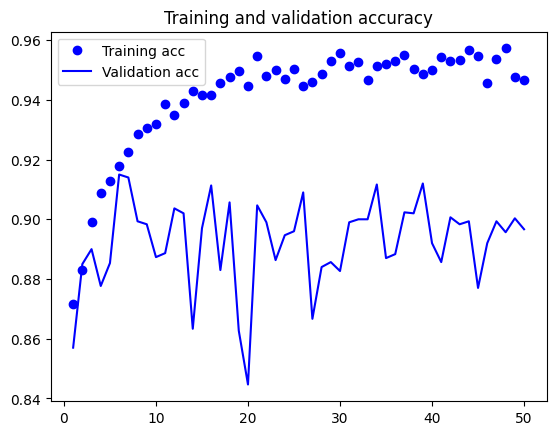

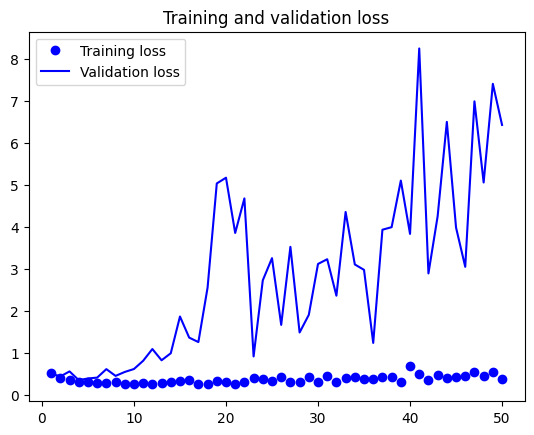

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Freeze conv base (model with data augmentation)


In [ ]:
convbase_DA = model_DA.get_layer("vgg16")
convbase_DA.trainable = True
for layer in convbase_DA.layers[:-4]:
    layer.trainable = False
for i, layer in enumerate(convbase_DA.layers):
    print(i, layer.name, layer.trainable)

0 input_layer_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


## Compilação da CNN
Compilação da CNN utilizando a loss **categorical crossentropy** e o optimizer **RMSprop**.

In [ ]:
model_DA.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

## Definição do callback
Definição de um callback que guarda automaticamente o modelo com a menor perda (loss) de validação durante o treino.

In [ ]:
checkpoint_filepath_DA = 'modelT_fineTuning_DataAugmentation.keras'
model_checkpoint_callback_DA = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_DA,
    monitor='val_loss',
    save_best_only=True)

## Treino da CNN
Treino da CNN durante 50 épocas utilizando o dataset de validação e o callback para guardar o melhor modelo.

In [ ]:
history_DA = model_DA.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=[model_checkpoint_callback_DA])

Epoch 1/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 46s 119ms/step - accuracy: 0.8146 - loss: 0.6256 - val_accuracy: 0.9023 - val_loss: 0.3703
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 36s 105ms/step - accuracy: 0.8563 - loss: 0.4852 - val_accuracy: 0.8760 - val_loss: 0.6289
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 36s 106ms/step - accuracy: 0.8678 - loss: 0.4349 - val_accuracy: 0.9083 - val_loss: 0.5470
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 37s 108ms/step - accuracy: 0.8750 - loss: 0.4388 - val_accuracy: 0.9067 - val_loss: 0.3656
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 56s 162ms/step - accuracy: 0.8797 - loss: 0.3924 - val_accuracy: 0.8883 - val_loss: 0.5498
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 130s 375ms/step - accuracy: 0.8829 - loss: 0.4157 - val_accuracy: 0.9047 - val_loss: 0.3831
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 129s 374ms/step - accuracy: 0.8840 - loss: 0.3831 - val_accuracy: 0.9067 - val_loss: 0.4357
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 133s 386ms/step - accuracy: 0.8874 - loss

## Carregamento do modelo e validação
Carregamento e avaliação do modelo através do valor da accuracy.

In [ ]:
model_DA = keras.models.load_model('modelT_fineTuning_DataAugmentation.keras')
val_loss, val_acc = model_DA.evaluate(validation_dataset)
print('val_acc:', val_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.9042 - loss: 0.3575
val_acc: 0.9066666960716248


Representação gráfica dos valores da accuracy e da loss ao longo das épocas.

In [ ]:
acc = history_DA.history['acc']
val_acc = history_DA.history['val_acc']
loss = history_DA.history['loss']
val_loss = history_DA.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Avaliação da performance do modelo no conjunto de teste, utilizando o relatório de classificação. O relatório apresenta, para cada classe, as métricas precision, recall e F1-score, permitindo analisar detalhadamente os acertos e erros por classe.

In [ ]:
y_true, y_pred = get_true_pred(model_DA, test_dataset)
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
class_only_report = {k: v for k, v in report.items() if k in class_names}
df = pd.DataFrame(class_only_report).T
print(df[['precision', 'recall', 'f1-score']].round(3))

## Comparação dos modelos utilizando a accuracy

In [ ]:
val_loss_, val_acc = model.evaluate(validation_dataset)
val_loss_DA, val_acc_CatCross_DA= model_DA.evaluate(validation_dataset)

print("Validation Accuracy dos modelos:")
print(f"Fine tuning: {val_acc:.4f}")
print(f"Fine tuning + Data augmentation: {val_acc_CatCross_DA:.4f}")


results = {
    'FineTuning': val_acc,
    'FineTuning_DataAugmentation': val_acc_CatCross_DA
}

best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print(f"\nMelhor modelo: {best_model} com val_accuracy = {best_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.8844 - loss: 0.3204
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.9056 - loss: 0.3537
Validation Accuracy dos modelos:
Fine tuning: 0.3595
Fine tuning + Data augmentation: 0.3656

Melhor modelo: FineTuning com val_accuracy = 0.8777


## Calcular saída do modelo para uma imagem

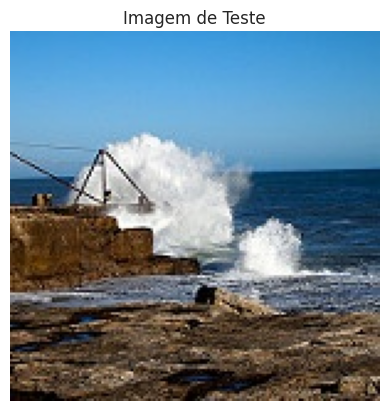

2025-06-12 23:23:29.159383: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.39 = (f32[1,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,150,150]{3,2,1,0} %bitcast.543, f32[64,3,3,3]{3,2,1,0} %bitcast.550, f32[64]{0} %bitcast.552), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1_1/vgg16_1/block1_conv1_1/convolution" source_file="/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-12 23:23:29.270445: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picke

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Probabilidades por classe:
 buildings: 0.0000
    forest: 0.0000
   glacier: 0.0000
  mountain: 0.0000
       sea: 1.0000
    street: 0.0000

Classe prevista: sea (1.0000)


In [ ]:
img_path = 'Dataset/archive/seg_test/sea/20072.jpg'

img = tf.keras.preprocessing.image.load_img(
    img_path,
    target_size=(150, 150),
    interpolation='bilinear'
)

plt.imshow(img)
plt.axis('off')
plt.title("Imagem de Teste")
plt.show()

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Previsão
result = model.predict(img_array)

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
print("Probabilidades por classe:")
for i, prob in enumerate(result[0]):
    print(f"{class_names[i]:>10s}: {prob:.4f}")

# Classe prevista
predicted_class = np.argmax(result)
print(f"\nClasse prevista: {class_names[predicted_class]} ({result[0][predicted_class]:.4f})")
